#**Chapter 2: Model Generation and Prediction**

# Installing Required Libraries

In [ ]:
!pip install boruta
!pip install researchpy
!pip install explainerdashboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 820.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 12.8 MB/s eta 0:00:00


In [ ]:
#Import all required packages:
import warnings
warnings.filterwarnings("ignore")
import os
import calendar
import itertools
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from explainerdashboard import ExplainerDashboard,RegressionExplainer
import torch
import torch.nn as nn
from boruta import BorutaPy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Embedding, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.losses import MeanSquaredError
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

plt.style.use('fivethirtyeight')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

#Loading our dataset and reading it into a dataframe
#We also print out the first five rows of our dataset

In [ ]:
# Load the dataset (replace 'your_dataset.csv' with the path to your dataset)
df = pd.read_csv('Coffee_Stores_Data.csv')

# Print the first 5 rows of the dataset
df.head()


,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales
0,2,2019-06-29,3000227,Caprese Sandwich,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,21,0,2.0,0.000000
1,2,2019-06-29,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.0,2.0,0.0,10,0,2.0,0.000000
2,2,2019-06-29,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,0.0,1.0,9.0,13,0,2.0,0.000000
3,2,2019-06-29,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0,0.0,27.0,0,0,2.0,0.000000
4,2,2019-06-29,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,11,1,2.0,0.578969


#Data Cleaning: By removing the rows with NaN values

In [ ]:
#Remove NaN values
df.dropna(inplace=True)
# Check for missing values
missing_values = df.isnull().sum()



In [ ]:
print('The number of observations of this dataset is ',len(df))

The number of observations of this dataset is  1247119


#1. Produce synthetic data using Generative models (GANs) to get accurate predictions even with little historical data where necessary.
#Answer: We have skipped this step since we have sufficient data
# `The number of observations of this dataset is  1259776`
# We have over 1.2 million data observations!

# Secondly, our computation sources were limited and hence this task was not able to come to fruition

# **FEATURE SELECTION**

# 2. Iterate through different combinations of features to identify the optimal features and remove potential correlated features (if any) for your predictions. Add weather, weekdays, holidays and temperature data to your features.


### **Indexing with Time Series Data and Adding Time-Related Features**

- In the following code snippet, we perform indexing with time series data and add several time-related features to the DataFrame.
- In the next code snippet, we indexed the `BusinessDate` column and extracted `Month`,` Year`,` Weekday`, `Weekend` and `National Holiday` as features. This is done for better insight and to see whether there are any interesting data patters that can be observed in predicting sales.
- At the end we added all the national holidays for 2019 and 2022, so as to understand how is it affecting the sales.
-We got the list of National holidays from [this site](https://www.commerce.gov/hr/employees/leave/holidays).

In [ ]:
df['date_column'] = pd.to_datetime(df['BusinessDate'])
#Indexing BusinessDate column
df= df.set_index('BusinessDate')
df['Month']=pd.DatetimeIndex(df.index).month
df['Year']= pd.DatetimeIndex(df.index).year
# Extract weekdays (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df['Weekday'] = pd.DatetimeIndex(df.index).weekday
# Add Weekday/Weekend Feature
df['is_weekend'] = df['date_column'].dt.dayofweek >= 5
national_holidays = ['2019-1-1','2020-1-1','2019-1-21','2020-1-21','2019-2-18','2020-2-18','2019-5-27','2020-5-27','2019-6-19','2020-6-19','2019-7-4','2020-7-4','2019-9-2','2020-9-2','2019-10-14','2020-10-14','2019-11-11','2020-11-11','2019-11-28','2020-11-28','2019-12-25','2020-12-25']
national_holidays = pd.to_datetime(national_holidays)
df['is_national_holiday'] = df['date_column'].isin(national_holidays)

#We have calculated the taget variable ```Sales``` to be predicted. We derived it through the Snippet provided below. The reason we are doing this is because in the documet there is an assumption mentioned.
## Assumption: The average selling price of a product is 3$
# And now ```Sales``` has become our Target Variable and we do not need SoldQuantity anymore. We can drop the ```SoldQuantity``` feature

In [ ]:
df['Sales'] = df['SoldQuantity'] * 3


#Printing the first five rows of our dataset

In [ ]:
df.head()

,StoreID,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,...,StockedOut,GroupID,MissedSales,date_column,Month,Year,Weekday,is_weekend,is_national_holiday,Sales
BusinessDate,,,,,,,,,,,,,,,,,,,,,
2019-06-29,2,3000227,Caprese Sandwich,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,...,0,2.0,0.000000,2019-06-29,6,2019,5,True,False,9.0
2019-06-29,2,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.0,2.0,0.0,...,0,2.0,0.000000,2019-06-29,6,2019,5,True,False,6.0
2019-06-29,2,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,0.0,1.0,9.0,...,0,2.0,0.000000,2019-06-29,6,2019,5,True,False,3.0
2019-06-29,2,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0,0.0,27.0,...,0,2.0,0.000000,2019-06-29,6,2019,5,True,False,0.0
2019-06-29,2,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,...,1,2.0,0.578969,2019-06-29,6,2019,5,True,False,9.0


#In this step we are dropping the features which do not add value in predicting the target variable ```Sales```
# The variable ```CategoryLvl1Desc``` is dropped is because t contains only one uniform value throughout for all observations and it does not add value if it is present in dataset or not

In [ ]:
# Assuming 'df' is your DataFrame
# If you don't have df, you can replace it with your actual DataFrame
df=df.drop('SoldQuantity', axis=1)
df=df.drop('CategoryLvl1Desc', axis=1)



#In the next step we see plot the Correlation Matrix

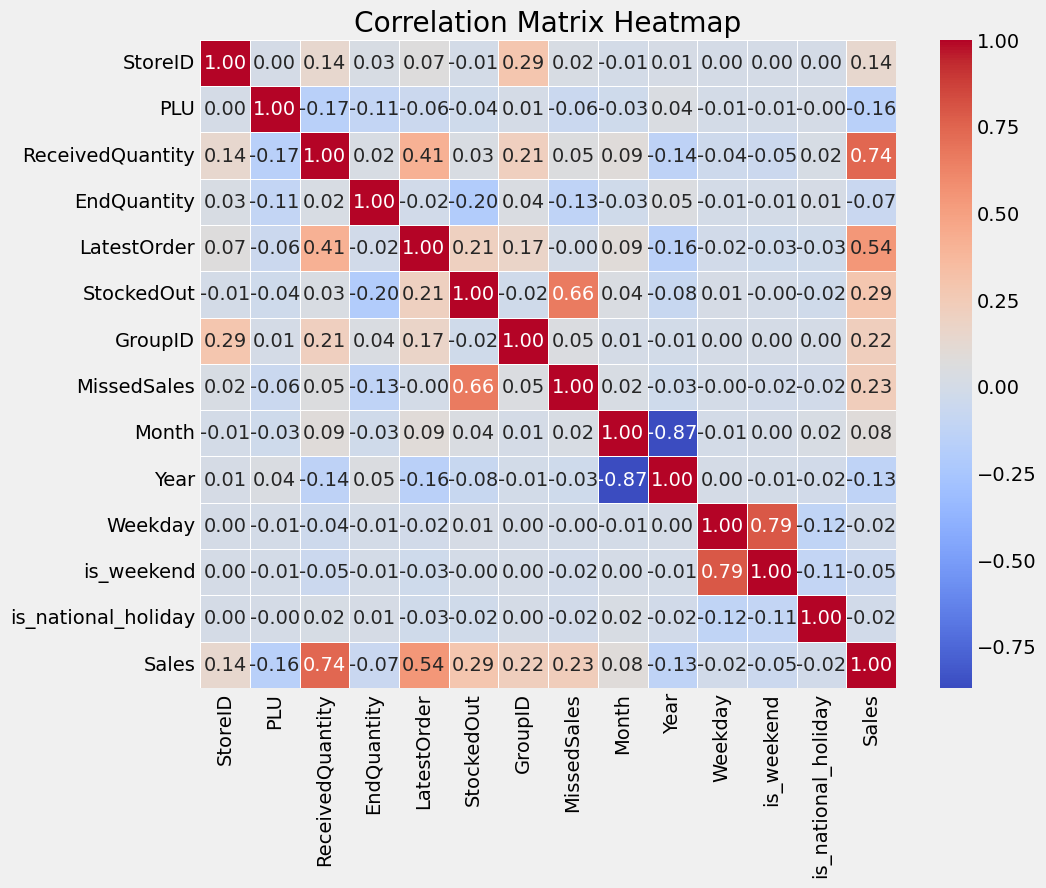

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#In this step below, we see which numerical features are having high correlation with Target Variable Sales
# The five features that are highly correlated with the ```Sales``` variable is ```ReceivedQuantity, LatestOrder, StockedOut, MissedSales, GroupID```

In [ ]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
high_correlation_features = correlation_matrix['Sales'].abs().sort_values(ascending=False).index[:6]
print(high_correlation_features)

Index(['Sales', 'ReceivedQuantity', 'LatestOrder', 'StockedOut', 'MissedSales',
       'GroupID'],
      dtype='object')


#Let us take a closer look and see which of the ```X``` features are correlated with each other.
#The aim of this step is to remove highly correlated ```X``` features so as to reduce overfitting during model generation

# Interestingly, we see that ```Missed Sales``` is highly correlated to ```StockedOut```

#Our Reasons to remove ```MissedSales```
- # Redundancy: If the two features are highly correlated, they might contain similar information. In some cases, keeping both features might not provide additional insights and could lead to redundancy.

- # Multicollinearity: High correlation between features can introduce multicollinearity issues in certain statistical models. Multicollinearity can make it challenging to interpret the individual contributions of features.

- # MissedSales: Not sure what these data signify (As stated in the document)


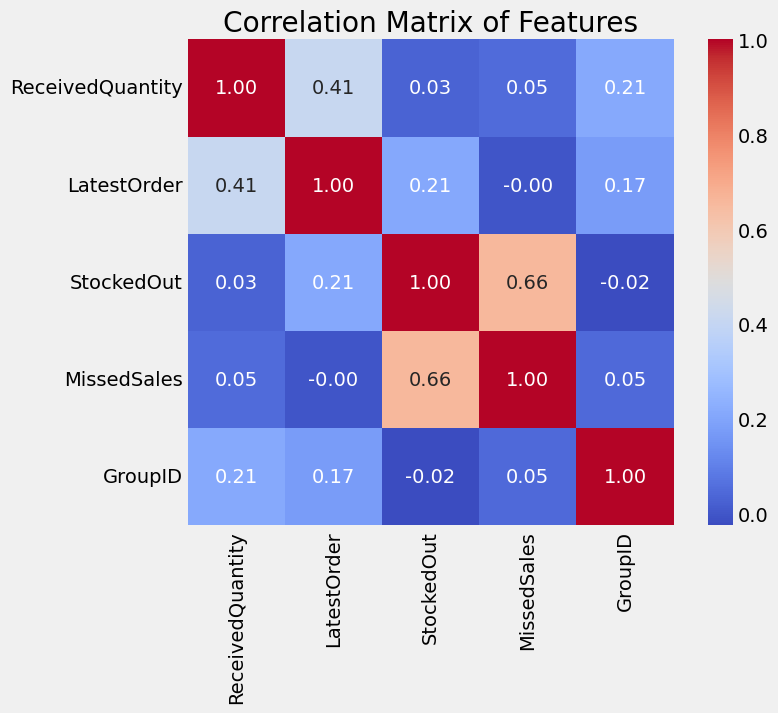

In [ ]:
X_high_corr_features=df[['ReceivedQuantity', 'LatestOrder', 'StockedOut',
       'MissedSales','GroupID']]
# Compute the correlation matrix for the features
correlation_matrix = X_high_corr_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Show the plot
plt.title("Correlation Matrix of Features")
plt.show()

#Dropping ```MissedSales```

In [ ]:
df=df.drop('MissedSales', axis=1)

#In the code cell given below we are encoding our Categorical Variables

In [ ]:
# Identify categorical columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns
# One-hot encode categorical columns
df= pd.get_dummies(df, columns=categorical_columns)


#Different Methods used for Feature Ranking:
#In the subsequent code cells, we are using four methods for feature ranking and from these we will pick 5 top features which will predict ```Sales``` target variable

#The methods used were:
- # Mutual Information: Evaluate the mutual information between features and the target variable. Higher mutual information indicates higher relevance.
- # Use LASSO regression to penalize less important features. The magnitude of the coefficients can serve as a measure of feature importance.
- # Tree-Based Methods: Decision tree-based algorithms can provide feature importance scores. Random Forest and Gradient Boosting models are commonly used for this purpose.
- # Recursive Feature Elimination (RFE): Use recursive feature elimination to recursively remove the least important features and rank them based on their impact on model performance.

# Creating  ```X``` features and ```y``` target variable

In [ ]:
#Creating Taget variable
y=df['Sales']
#Dropping ```Sales``` and assigning it to our from features
X=df.drop('Sales', axis=1)


In [ ]:
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Method 1: Mutual Information Regression

In [ ]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X[numerical_columns], y)
feature_ranking = pd.Series(mi, index=numerical_columns).sort_values(ascending=False)
print(feature_ranking.head(10))



ReceivedQuantity    0.486003
LatestOrder         0.485220
PLU                 0.238287
StockedOut          0.092517
StoreID             0.071254
EndQuantity         0.055861
GroupID             0.029490
Month               0.027232
Year                0.014004
Weekday             0.003427
dtype: float64


#Method 2: Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X[numerical_columns], y)
feature_ranking = pd.Series(rfe.ranking_, index=X[numerical_columns].columns).sort_values(ascending=True)
print(feature_ranking.head(10))

StockedOut           1
ReceivedQuantity     2
GroupID              3
LatestOrder          4
Year                 5
Month                6
EndQuantity          7
Weekday              8
StoreID              9
PLU                 10
dtype: int64


#Method 3: Tree- Based Method

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X[numerical_columns], y)
feature_ranking = pd.Series(model.feature_importances_, index=X[numerical_columns].columns).sort_values(ascending=False)
print(feature_ranking.head(10))

ReceivedQuantity    0.536643
LatestOrder         0.163847
StockedOut          0.081716
StoreID             0.057366
PLU                 0.042685
EndQuantity         0.037746
Month               0.032483
Weekday             0.029768
GroupID             0.014872
Year                0.002874
dtype: float64


#Method 4: Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.01)
model.fit(X[numerical_columns], y)
feature_ranking = pd.Series(np.abs(model.coef_), index=X[numerical_columns].columns).sort_values(ascending=False)
print(feature_ranking.head(10))

StockedOut          4.447811e+00
ReceivedQuantity    1.459570e+00
Year                8.235961e-01
GroupID             3.712127e-01
LatestOrder         3.644310e-01
Month               9.129970e-02
EndQuantity         6.876693e-02
Weekday             4.306370e-02
StoreID             2.115659e-03
PLU                 3.721740e-07
dtype: float64


#Finally the features we selected AS ```X``` are:
- # ```ReceivedQuantity```
- # ```StockedOut```
- # ```LatestOrder```
- # ```date_column```


In [ ]:


selected_features=['date_column','ReceivedQuantity', 'LatestOrder', 'StockedOut']

X=df[selected_features]
# # Assuming df['date_column'] is your timestamp column
X['date_column'] = X['date_column'].astype(int)


# As already mentioned
y=df['Sales']

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
X= scaler.fit_transform(X)

#Doing a Train Test Split
#Training: 80%
#Testing : 20%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 3. (optional) Start with a quick linear regression to get a sense of data.
 # Linear regression may not result in a great prediction

In [ ]:
# Create a linear regression model
model = LinearRegression()


# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 31.424257807833786
Root Mean Squared Error: 5.605734368290544
Coefficients: [0.23370514 6.12393037 2.28017035 2.11089904]
Intercept: 9.946129413560955


In [ ]:
# Convert X_test to a NumPy array and flatten if needed
X_test_array = X_test.reshape(-1, len(selected_features))

# Convert y_test to a NumPy array and flatten if needed
y_test_array = np.array(y_test).flatten()

# Create a DataFrame with true values, predicted values, and selected features
result_df = pd.DataFrame(X_test_array, columns=selected_features)
result_df['True Sales'] = y_test_array
result_df['Predicted Sales'] = y_pred

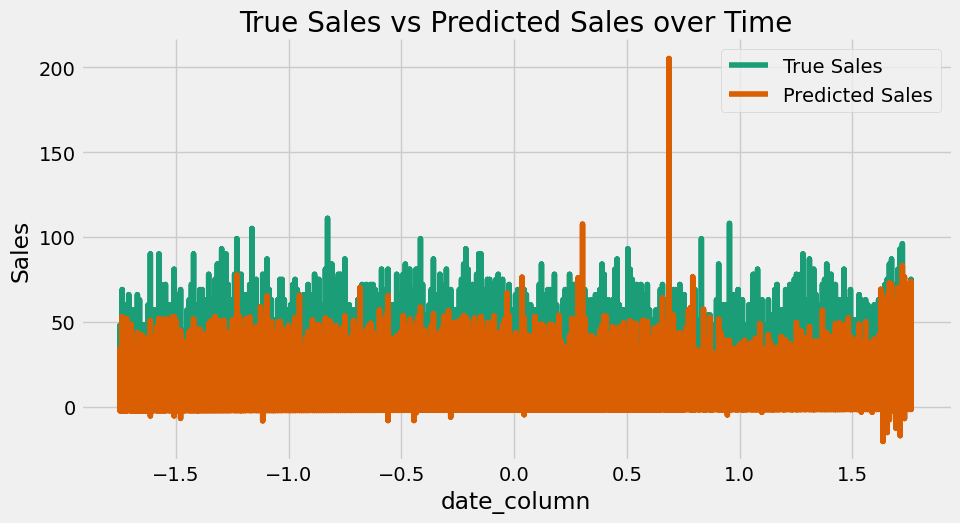

In [ ]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['date_column']
    ys = series[series_name]

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2))
df_sorted = result_df.sort_values('date_column', ascending=True)

# Plot 'True Sales'
_plot_series(df_sorted, 'True Sales')

# Plot 'Predicted Sales'
_plot_series(df_sorted, 'Predicted Sales', series_index=1)  # You can adjust series_index for different colors

sns.despine(fig=fig, ax=ax)
plt.xlabel('date_column')
plt.ylabel('Sales')
plt.legend()
plt.title('True Sales vs Predicted Sales over Time')
plt.show()


# 6. As we are dealing with time-series data, we would like to compare the results of the previous models with the following deep methods:
## a. CNN
## b. LSTM
## c. LSTM + Attention

#CNN Model

#We see that the CNN Model has performed very poorly even compared to Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Assuming X_train_reshaped.shape[1] is the number of time steps, and 1 is the number of features
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='linear')  # Adjust activation for regression
])

# Compile the model for regression
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Use 'mse' for regression

# Print the model summary
print(cnn_model.summary())
# Now, you can use the trained model to make predictions on new data
# For example, if X_test is your test data:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
predictions = cnn_model.predict(X_test)
# Evaluate the performance of the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Convert X_test to a NumPy array and flatten if needed
X_test_array = X_test.reshape(-1, len(selected_features))

# Convert y_test to a NumPy array and flatten if needed
y_test_array = np.array(y_test).flatten()

# Create a DataFrame with true values, predicted values, and selected features
result_df = pd.DataFrame(X_test_array, columns=selected_features)
result_df['True Sales'] = y_test_array
result_df['Predicted Sales'] = predictions

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,493
Trainable params: 3,493
Non-trainable params: 0
______________________________________________________

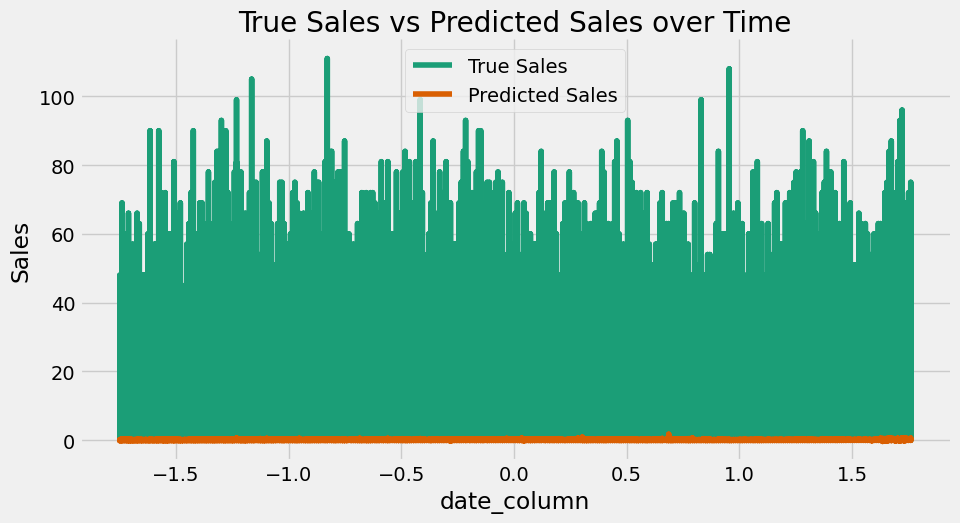

In [ ]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['date_column']
    ys = series[series_name]

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2))
df_sorted = result_df.sort_values('date_column', ascending=True)

# Plot 'True Sales'
_plot_series(df_sorted, 'True Sales')

# Plot 'Predicted Sales'
_plot_series(df_sorted, 'Predicted Sales', series_index=1)  # You can adjust series_index for different colors

sns.despine(fig=fig, ax=ax)
plt.xlabel('date_column')
plt.ylabel('Sales')
plt.legend()
plt.title('True Sales vs Predicted Sales over Time')
plt.show()


#LSTM Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(None, 28)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10))
print(model.summary())
# Create LSTM model
model = Sequential()

# Add an LSTM layer with 50 units
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))

# Add a Dense output layer with 1 unit (for regression tasks)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Assuming a regression task

# Fit the model to the training data
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)





Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                23808     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 24,714
Trainable params: 24,586
Non-trainable params: 128
_________________________________________________________________
None
Epoch 1/50
12472/12472 [==============================] - 87s 7ms/step - loss: 26.1165 - val_loss: 22.6685
Epoch 2/50
12472/12472 [==============================] - 83s 7ms/step - loss: 22.4787 - val_loss: 22.1367
Epoch 3/50
12472/12472 [===

In [ ]:
# Now, you can use the trained model to make predictions on new data
# For example, if X_test is your test data:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
predictions = model.predict(X_test)
# Evaluate the performance of the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Convert X_test to a NumPy array and flatten if needed
X_test_array = X_test.reshape(-1, len(selected_features))

# Convert y_test to a NumPy array and flatten if needed
y_test_array = np.array(y_test).flatten()

# Create a DataFrame with true values, predicted values, and selected features
result_df_lstm = pd.DataFrame(X_test_array, columns=selected_features)
result_df_lstm['True Sales'] = y_test_array
result_df_lstm['Predicted Sales'] = predictions

7795/7795 [==============================] - 19s 2ms/step
Mean Squared Error: 20.986327368246037
Root Mean Squared Error: 4.581083645628623


In [ ]:
result_df_lstm

,date_column,ReceivedQuantity,LatestOrder,StockedOut,True Sales,Predicted Sales
0,-0.760899,1.841435,0.549631,1.590989,33.0,34.839062
1,0.543078,-0.609494,-0.263023,-0.628540,3.0,3.999441
2,0.399257,0.861064,0.712162,-0.628540,12.0,14.923484
3,-0.434905,-0.119308,0.224569,-0.628540,6.0,6.467267
4,-0.655430,-1.099679,-1.725802,-0.628540,0.0,0.031175
...,...,...,...,...,...,...
249419,-1.633412,0.370878,0.062039,1.590989,18.0,16.841206
249420,-1.326594,-0.854586,-1.725802,-0.628540,0.0,-0.058632
249421,-1.345770,0.861064,1.199755,-0.628540,15.0,15.813065
249422,1.070421,-1.099679,0.224569,1.590989,3.0,5.923223


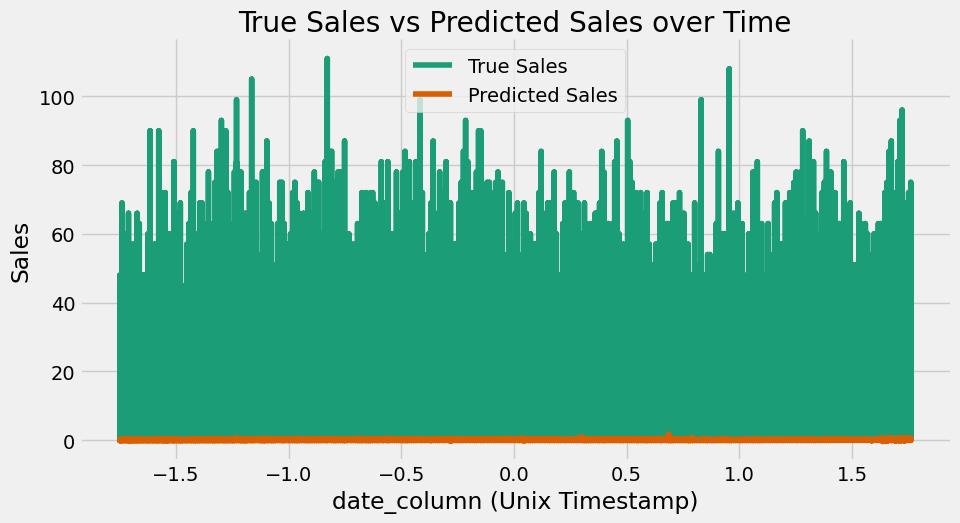

In [ ]:


def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['date_column']
    ys = series[series_name]

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2))
df_sorted = result_df.sort_values('date_column', ascending=True)

# Plot 'True Sales'
_plot_series(df_sorted, 'True Sales')

# Plot 'Predicted Sales'
_plot_series(df_sorted, 'Predicted Sales', series_index=1)  # You can adjust series_index for different colors

sns.despine(fig=fig, ax=ax)
plt.xlabel('date_column (Unix Timestamp)')
plt.ylabel('Sales')
plt.legend()
plt.title('True Sales vs Predicted Sales over Time')
plt.show()


In [ ]:
model.save("Normalized_LSTM_model_.h5")

In [36]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Multiply, Permute, RepeatVector, Flatten, Activation
import tensorflow as tf

X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Custom attention mechanism function
def attention_mechanism(inputs):
    lstm_units = int(inputs.shape[2])
    attention = Dense(1, activation='tanh')(inputs)
    attention = Flatten()(attention)
    attention = Activation('softmax')(attention)
    attention = RepeatVector(lstm_units)(attention)
    attention = Permute([2, 1])(attention)
    attention_output = Multiply()([inputs, attention])
    return attention_output

# Define the model using the functional API
inputs = Input(shape=(1, X_train.shape[1]))
lstm_out = LSTM(50, return_sequences=True)(inputs)
attention_out = attention_mechanism(lstm_out)
lstm_out_2 = LSTM(50)(attention_out)
output = Dense(1)(lstm_out_2)


# Compile the model
model_atten = Model(inputs=[inputs], outputs=[output])
model_atten.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to the training data
history = model_atten.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

# Make Predictions
predictions = model_atten.predict(X_test_reshaped)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Test MSE: {mse}')

Epoch 1/50
12472/12472 [==============================] - 97s 7ms/step - loss: 26.3798 - val_loss: 22.8368
Epoch 2/50
12472/12472 [==============================] - 90s 7ms/step - loss: 22.9759 - val_loss: 22.6262
Epoch 3/50
12472/12472 [==============================] - 92s 7ms/step - loss: 22.7758 - val_loss: 22.4098
Epoch 4/50
12472/12472 [==============================] - 90s 7ms/step - loss: 22.6448 - val_loss: 22.2469
Epoch 5/50
12472/12472 [==============================] - 90s 7ms/step - loss: 22.4852 - val_loss: 21.9877
Epoch 6/50
12472/12472 [==============================] - 88s 7ms/step - loss: 22.3413 - val_loss: 21.8530
Epoch 7/50
12472/12472 [==============================] - 91s 7ms/step - loss: 22.1929 - val_loss: 21.8606
Epoch 8/50
12472/12472 [==============================] - 85s 7ms/step - loss: 22.0894 - val_loss: 21.7486
Epoch 9/50
12472/12472 [==============================] - 89s 7ms/step - loss: 22.0383 - val_loss: 21.7839
Epoch 10/50
12472/12472 [============

In [37]:
model.save("Normalized_LSTM_attention_model_.h5")

In [39]:
predictions_atten = model_atten.predict(X_test_reshaped)
result_df_lstm['Predicted Sales by lstm + attention'] = predictions_atten.flatten()
result_df_lstm['Predicted Sales by LSTM'] = result_df_lstm['Predicted Sales']

result_df_lstm

7795/7795 [==============================] - 27s 3ms/step


,date_column,ReceivedQuantity,LatestOrder,StockedOut,True Sales,Predicted Sales,Predicted Sales by lstm + attention,Predicted Sales by LSTM
0,-0.760899,1.841435,0.549631,1.590989,33.0,34.839062,35.247547,34.839062
1,0.543078,-0.609494,-0.263023,-0.628540,3.0,3.999441,4.393588,3.999441
2,0.399257,0.861064,0.712162,-0.628540,12.0,14.923484,15.278094,14.923484
3,-0.434905,-0.119308,0.224569,-0.628540,6.0,6.467267,7.033500,6.467267
4,-0.655430,-1.099679,-1.725802,-0.628540,0.0,0.031175,0.064745,0.031175
...,...,...,...,...,...,...,...,...
249419,-1.633412,0.370878,0.062039,1.590989,18.0,16.841206,17.040501,16.841206
249420,-1.326594,-0.854586,-1.725802,-0.628540,0.0,-0.058632,0.033175,-0.058632
249421,-1.345770,0.861064,1.199755,-0.628540,15.0,15.813065,16.023039,15.813065
249422,1.070421,-1.099679,0.224569,1.590989,3.0,5.923223,6.065646,5.923223


#Overall Inference:
- The standard LSTM model appears to be the most effective for your specific task, based on the provided metrics.
- The CNN model is less suited to this particular task or dataset.
- The addition of the attention mechanism to the LSTM does not yield a significant improvement in this instance, which might be due to the nature of the task or data, or the specific way the attention mechanism is integrated into the model.
- Attention mechanisms are generally used to improve the performance of LSTMs by allowing the model to focus on specific parts of the input sequence, but in this case, it doesn’t seem to provide a significant advantage. This could be due to various factors such as the nature of the dataset, the complexity of the task, or the specific configuration of the attention mechanis